# MNIST
Modified National Institute of Standards and Technology
which large database of handwritten digits that is commonly used for training various image processing systems.



















In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
#used in jupyter notebook to display plots in the output itself rather than a separate window
import numpy as np
import seaborn as sns
import pandas as pd

# Data Collection

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


(28, 28)


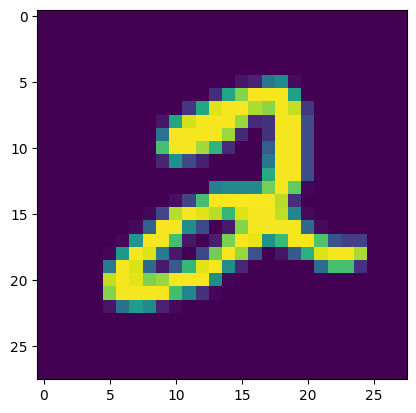

In [5]:
plt.imshow(X_train[5])
print(X_train[5].shape)

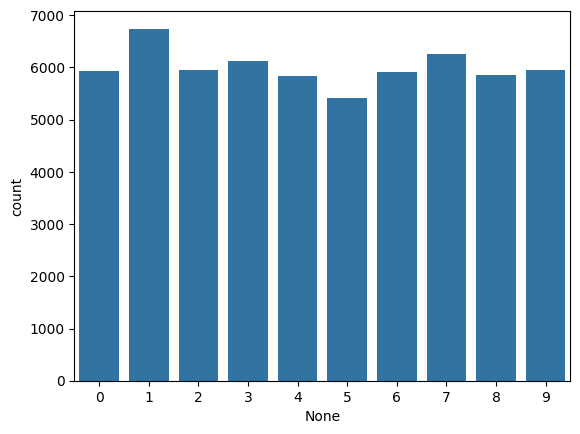

In [6]:
sns.countplot(x=pd.Series(y_train))
plt.show()

In [7]:
X_train[0][25]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

Normalization

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train[0].shape

(28, 28)

In [12]:
X_train_matrix=X_train.reshape(-1,28*28)

In [13]:
print(X_train_matrix.shape)
X_test_matrix=X_test.reshape(-1,28*28)
print(X_test_matrix[0])

(60000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [14]:
model=keras.Sequential([
    keras.layers.Dense(128,input_shape=(784,),activation='relu'),
    keras.layers.Dense(128,input_shape=(128,),activation='relu'),
    keras.layers.Dense(10,input_shape=(128,),activation='softmax'),
])
print(model.summary())

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
model.input_shape

(None, 784)

In [16]:
history=model.fit(X_train_matrix,y_train,epochs=3,batch_size=32)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8830 - loss: 0.4027
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9709 - loss: 0.0971
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9774 - loss: 0.0685


In [17]:
# model.fit(X_train_matrix,y_train,epochs=3,batch_size=64)

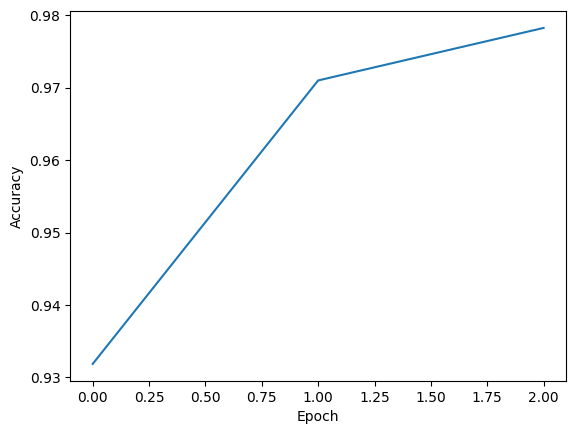

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend()
plt.show()

In [19]:
model.evaluate(X_test_matrix,y_test)
y_pred=model.predict(X_test_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0902
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
print(y_test)

[7 2 1 ... 4 5 6]


In [21]:
print(y_pred[0])

[7.5010269e-07 1.2540934e-06 2.2207132e-05 5.6462577e-05 1.6493857e-09
 7.7275750e-08 1.9852536e-11 9.9991161e-01 2.1942547e-07 7.3250967e-06]


In [22]:
y_pred = np.argmax(y_pred, axis=1)

In [23]:
print(y_pred)

[7 2 1 ... 4 5 6]


<Axes: >

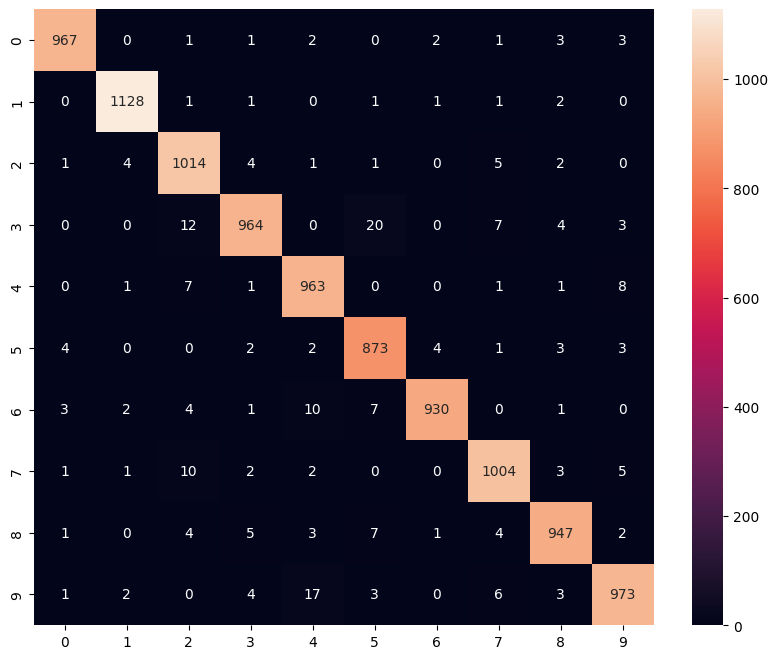

In [24]:
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [25]:
from PIL import Image as PILImage
import requests
from io import BytesIO
url = "https://drive.google.com/uc?export=view&id=1Km0zRlxQka6DBFzx0mdWsEhVpgJjv0pB"
response = requests.get(url)
img = PILImage.open(BytesIO(response.content))

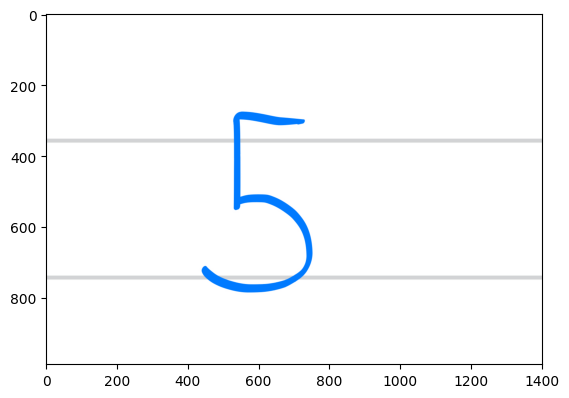

In [26]:
plt.imshow(img)

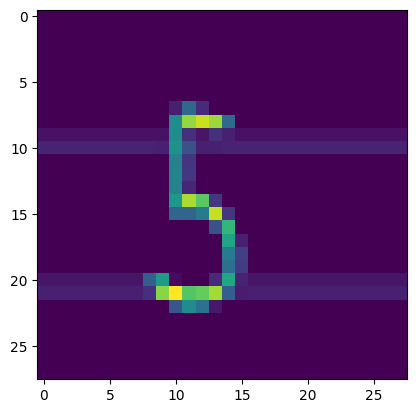

In [27]:
img1 = img.convert('L').resize((28, 28))
plt.imshow(img1)
img2=255-np.array(img1)
plt.imshow(img2)
img_array = img2 / 255.0
img_array = img_array.reshape(1, 28*28)

In [28]:
print(np.argmax(model.predict(img_array), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[5]
